In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
parquet_file = "ack_latency_1766756072.parquet"
df = pd.read_parquet(parquet_file)
print(f"Loaded {len(df)} records from {parquet_file}")
df.head()

Loaded 829866 records from ack_latency_1766756072.parquet


,source_timestamp,robot_id,ack_latency
0,2025-12-26T13:33:06.922335+00:00,92,0.841138
1,2025-12-26T13:33:07.382829+00:00,98,0.380684
2,2025-12-26T13:33:07.382862+00:00,99,0.380661
3,2025-12-26T13:33:07.383034+00:00,93,0.380493
4,2025-12-26T13:33:07.383069+00:00,94,0.380461


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829866 entries, 0 to 829865
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source_timestamp  829866 non-null  object 
 1   robot_id          829866 non-null  int64  
 2   ack_latency       829866 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.0+ MB


In [4]:
print("Ack Latency Statistics (seconds):")
df["ack_latency"].describe()

Ack Latency Statistics (seconds):


count    829866.000000
mean          0.040550
std           0.010315
min           0.023373
25%           0.036382
50%           0.040010
75%           0.043563
max           0.906340
Name: ack_latency, dtype: float64

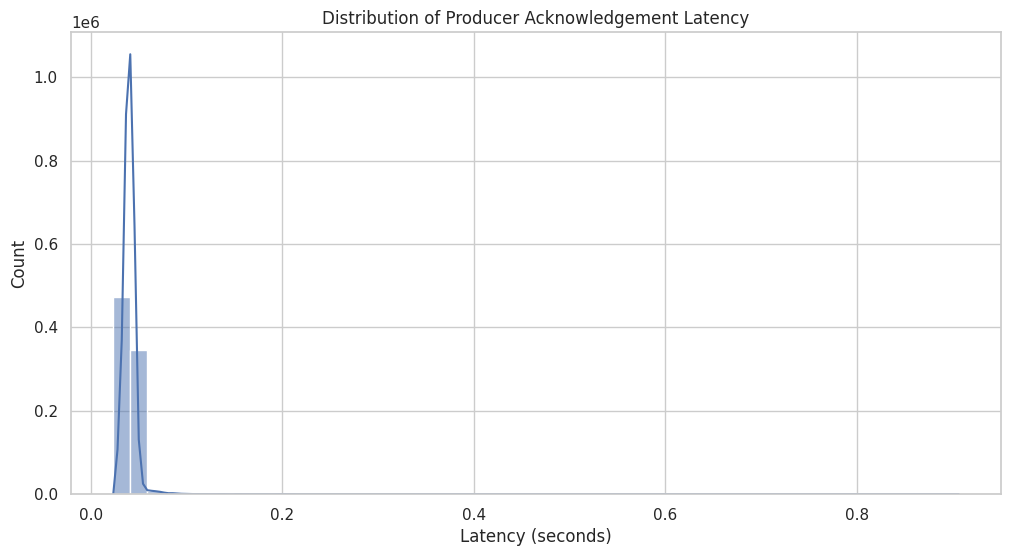

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="ack_latency", kde=True, bins=50)
plt.title("Distribution of Producer Acknowledgement Latency")
plt.xlabel("Latency (seconds)")
plt.ylabel("Count")
plt.show()

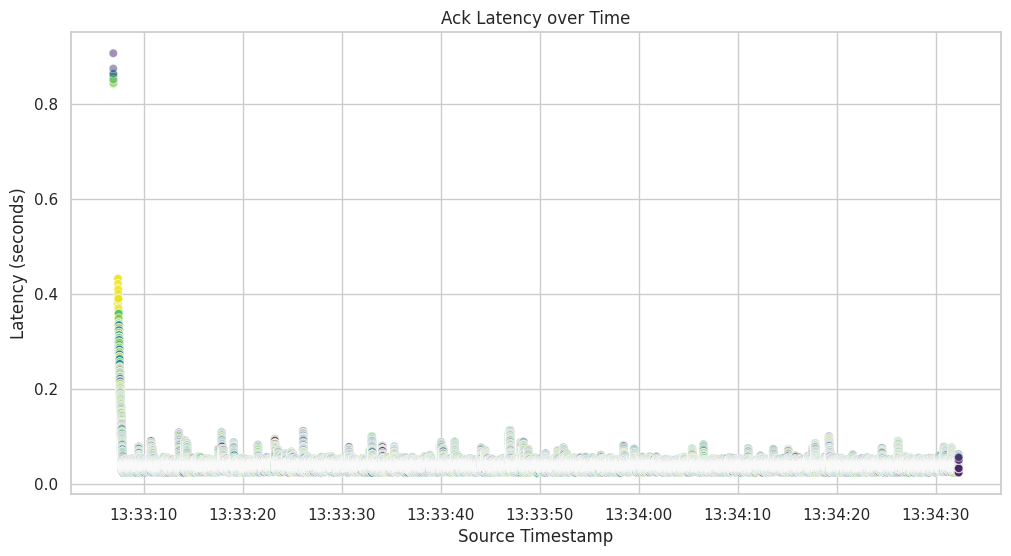

In [6]:
# Convert source_timestamp to datetime
try:
    df['timestamp_dt'] = pd.to_datetime(df['source_timestamp'])
except Exception as e:
    print(f"Could not parse timestamp: {e}")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="timestamp_dt", y="ack_latency", alpha=0.5, hue="robot_id", palette="viridis", legend=False)
plt.title("Ack Latency over Time")
plt.xlabel("Source Timestamp")
plt.ylabel("Latency (seconds)")
plt.show()

Too many robots (100) for boxplot. Showing top 10 robots by max latency.


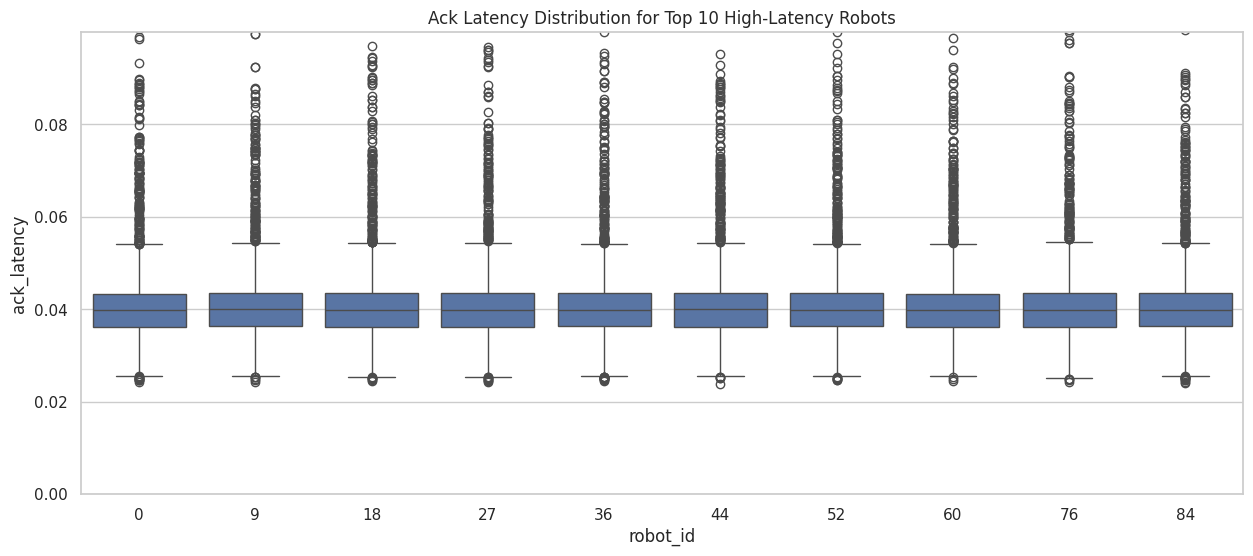

In [12]:
import numpy as np 

if 'robot_id' in df.columns:
    plt.figure(figsize=(15, 6))
    
    robot_counts = df['robot_id'].nunique()
    
    if robot_counts <= 20:
        sns.boxplot(data=df, x="robot_id", y="ack_latency")
        plt.title("Ack Latency Distribution per Robot")
    else:
        print(f"Too many robots ({robot_counts}) for boxplot. Showing top 10 robots by max latency.")
        
        # Find robots with high latency
        max_latency_by_robot = df.groupby('robot_id')['ack_latency'].max().sort_values(ascending=False).head(10)
        top_robots = df[df['robot_id'].isin(max_latency_by_robot.index)]
        
        sns.boxplot(data=top_robots, x="robot_id", y="ack_latency")
        plt.ylim(0, 0.10)
        plt.yticks(np.arange(0, 0.10, 0.02))
        plt.title("Ack Latency Distribution for Top 10 High-Latency Robots")

    plt.show()